In [1]:
!git clone https://github.com/rwightman/pytorch-image-models

Cloning into 'pytorch-image-models'...
remote: Enumerating objects: 10258, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 10258 (delta 34), reused 46 (delta 31), pack-reused 10201
Receiving objects: 100% (10258/10258), 19.90 MiB | 19.57 MiB/s, done.
Resolving deltas: 100% (7549/7549), done.


In [2]:
!git clone https://github.com/Luolc/AdaBound.git

Cloning into 'AdaBound'...
remote: Enumerating objects: 132, done.
remote: Total 132 (delta 0), reused 0 (delta 0), pack-reused 132
Receiving objects: 100% (132/132), 2.00 MiB | 11.12 MiB/s, done.
Resolving deltas: 100% (53/53), done.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
pip install adabound


In [5]:
pip install keras-adabound

  Created wheel for keras-adabound: filename=keras_adabound-0.6.0-py3-none-any.whl size=6609 sha256=98200fc098a26ffff8043dd37f37cca1f265c975c40b3cc41b41fa77ba06d848
  Stored in directory: /root/.cache/pip/wheels/3e/bf/39/3d95847ef12aa58c15a6cc7a20f4f21ea39fcd52793e1beea0
Successfully built keras-adabound


In [6]:
%cd /content/pytorch-image-models/

/content/pytorch-image-models


In [9]:
!python train.py 1   --model resnet50d --sched cosine --epochs 40 --warmup-epochs 5 --lr 5e-3 --bce-target-thresh 0.2  --smoothing 0.1 --mixup 0.2 --batch-size 32 --amp -j 2 --opt RMSprop

Training with a single process on 1 GPUs.
Model resnet50d created, param count:25576264
Data processing configuration for current model + dataset:
	input_size: (3, 224, 224)
	interpolation: bicubic
	mean: (0.485, 0.456, 0.406)
	std: (0.229, 0.224, 0.225)
	crop_pct: 0.875
Using native Torch AMP. Training in mixed precision.
Scheduled epochs: 50
Train: 0 [   0/304 (  0%)]  Loss: 6.941 (6.94)  Time: 17.739s,    1.80/s  (17.739s,    1.80/s)  LR: 1.000e-04  Data: 13.344 (13.344)
Train: 0 [  50/304 ( 17%)]  Loss: 2.944 (3.41)  Time: 0.169s,  188.93/s  (3.019s,   10.60/s)  LR: 1.000e-04  Data: 0.003 (2.755)
Train: 0 [ 100/304 ( 33%)]  Loss: 2.615 (3.15)  Time: 0.175s,  182.46/s  (2.801s,   11.42/s)  LR: 1.000e-04  Data: 0.004 (2.577)
Train: 0 [ 150/304 ( 50%)]  Loss: 2.920 (3.05)  Time: 0.181s,  176.40/s  (2.777s,   11.52/s)  LR: 1.000e-04  Data: 0.003 (2.566)
Train: 0 [ 200/304 ( 66%)]  Loss: 2.517 (2.98)  Time: 3.035s,   10.54/s  (2.778s,   11.52/s)  LR: 1.000e-04  Data: 2.842 (2.574)
Train

In [10]:
!python validate.py /content/drive/MyDrive/imagenette2-320/val/ --model resnet50d --checkpoint ./output/train/20220512-165441-resnet50d-224/checkpoint-37.pth.tar

Validating in float32. AMP not enabled.
Loaded state_dict from checkpoint './output/train/20220512-165441-resnet50d-224/checkpoint-37.pth.tar'
Model resnet50d created, param count: 25576264
Data processing configuration for current model + dataset:
	input_size: (3, 224, 224)
	interpolation: bicubic
	mean: (0.485, 0.456, 0.406)
	std: (0.229, 0.224, 0.225)
	crop_pct: 0.875
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Test: [   0/16]  Time: 7.076s (7.076s,   36.18/s)  Loss:  1.0717 (1.0717)  Acc@1:  76.953 ( 76.953)  Acc@5:  98.438 ( 98.438)
Test: [  10/16]  Time: 0.686s (1.796s,  142.

In [11]:
!python inference.py /content/drive/MyDrive/imagenette2-320/val/ --model resnet50d --checkpoint ./output/train/20220512-165441-resnet50d-224/checkpoint-37.pth.tar

Loaded state_dict from checkpoint './output/train/20220512-165441-resnet50d-224/checkpoint-37.pth.tar'
Model resnet50d created, param count: 25576264
Predict: [0/16] Time 7.569 (7.569)
Predict: [10/16] Time 0.704 (1.748)


In [14]:
!python validate.py /content/drive/MyDrive/imagenette2-320/val/ --model resnet50d --checkpoint ./output/train/20220512-165441-resnet50d-224/checkpoint-38.pth.tar

Validating in float32. AMP not enabled.
Loaded state_dict from checkpoint './output/train/20220512-165441-resnet50d-224/checkpoint-38.pth.tar'
Model resnet50d created, param count: 25576264
Data processing configuration for current model + dataset:
	input_size: (3, 224, 224)
	interpolation: bicubic
	mean: (0.485, 0.456, 0.406)
	std: (0.229, 0.224, 0.225)
	crop_pct: 0.875
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Test: [   0/16]  Time: 6.521s (6.521s,   39.26/s)  Loss:  1.0268 (1.0268)  Acc@1:  78.516 ( 78.516)  Acc@5:  98.438 ( 98.438)
Test: [  10/16]  Time: 0.737s (1.786s,  143.

In [13]:
!python validate.py /content/drive/MyDrive/imagenette2-320/val/ --model resnet50d --checkpoint ./output/train/20220512-165441-resnet50d-224/checkpoint-47.pth.tar

Validating in float32. AMP not enabled.
Loaded state_dict from checkpoint './output/train/20220512-165441-resnet50d-224/checkpoint-47.pth.tar'
Model resnet50d created, param count: 25576264
Data processing configuration for current model + dataset:
	input_size: (3, 224, 224)
	interpolation: bicubic
	mean: (0.485, 0.456, 0.406)
	std: (0.229, 0.224, 0.225)
	crop_pct: 0.875
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Test: [   0/16]  Time: 6.293s (6.293s,   40.68/s)  Loss:  1.0368 (1.0368)  Acc@1:  78.125 ( 78.125)  Acc@5:  98.438 ( 98.438)
Test: [  10/16]  Time: 0.715s (1.881s,  136.

In [15]:
import csv

#this will need to be changed
with open('/content/summary-RMSprop.csv') as File:  
    Line_reader = csv.reader(File)

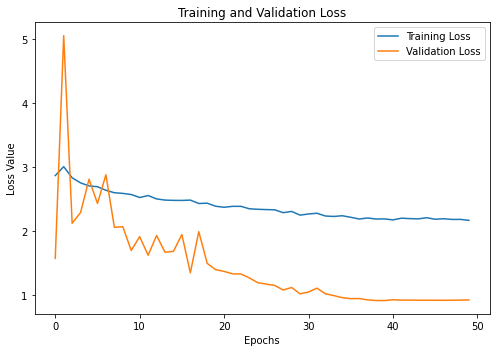

In [16]:
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
import pandas as pd
import csv 

plt.rcParams["figure.figsize"] = [7.00, 5.00]
plt.rcParams["figure.autolayout"] = True

columns = ['train_loss', 'eval_loss']


df = pd.read_csv("/content/summary-RMSprop.csv", usecols = columns)
  


df.columns=['Training Loss','Validation Loss']

df.plot()

plt.legend(loc='upper right')

plt.xlabel('Epochs') 

plt.ylabel('Loss Value') 

plt.title('Training and Validation Loss') 
plt.legend() 
plt.show()

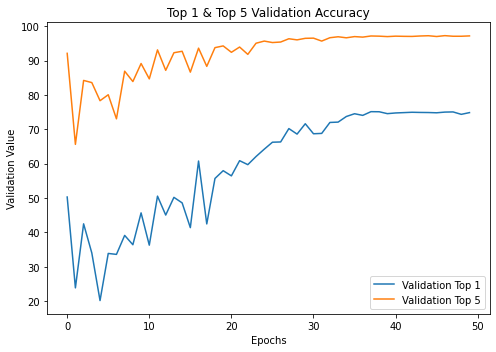

In [17]:
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
import pandas as pd
import csv 

plt.rcParams["figure.figsize"] = [7.00, 5.00]
plt.rcParams["figure.autolayout"] = True

columns = ['eval_top1', 'eval_top5']


df = pd.read_csv("/content/summary-RMSprop.csv", usecols = columns)
  


df.columns=['Validation Top 1','Validation Top 5']

df.plot()

plt.legend(loc='lower right')

plt.xlabel('Epochs') 

plt.ylabel('Validation Value') 

plt.title('Top 1 & Top 5 Validation Accuracy') 
plt.legend() 
plt.show()